In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
load_path = r'../preprocessing_data/'
load_sub = r'../data/'

train_df = pd.read_csv(load_path + 'preprocessed_train.csv')
test_df = pd.read_csv(load_path + 'preprocessed_test.csv')
submission = pd.read_csv(load_sub + 'submission.csv')

# Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = train_df.drop(['box_off_num'], axis = 1)
y = train_df['box_off_num']

In [6]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state = 2024)

# Tree

In [7]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, root_mean_squared_error 

In [8]:
tree = DecisionTreeRegressor()
tree.fit(train_x, train_y)

tree_pred = tree.predict(valid_x)

tree_mae = mean_absolute_error(valid_y, tree_pred)
tree_rmse = root_mean_squared_error(valid_y, tree_pred)

print(f'''
tree
    MAE : {tree_mae}
    RMSE : {tree_rmse}
''')


tree
    MAE : 723227.4666666667
    RMSE : 1574956.3350121225



# visualization

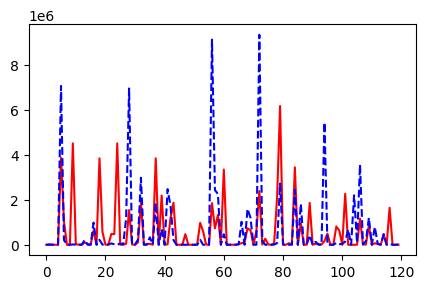

In [9]:
plt.figure(figsize = (5, 3))

plt.plot(range(len(valid_y)), tree_pred, color = 'red')
plt.plot(range(len(valid_y)), valid_y, color = 'blue', linestyle = '--')

plt.show()

# test data

In [10]:
test_x = test_df

test_pred = tree.predict(test_x)

In [11]:
submission['box_off_num'] = test_pred

submission

,title,box_off_num
0,용서는 없다,4720050.0
1,아빠가 여자를 좋아해,4113446.0
2,하모니,1346754.0
3,의형제,1624573.0
4,평행 이론,1624573.0
...,...,...
238,해에게서 소년에게,5105.0
239,울보 권투부,9301.0
240,어떤살인,24020.0
241,말하지 못한 비밀,5212.0


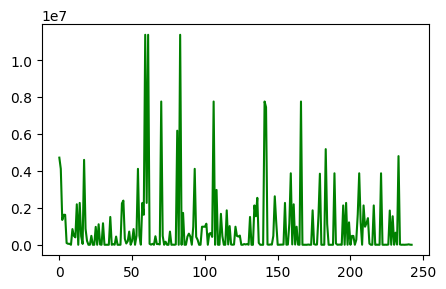

In [12]:
plt.figure(figsize =(5, 3))

plt.plot(range(submission.shape[0]), test_pred, color = 'green')

plt.show()

In [13]:
cond = submission['box_off_num'] == max(test_pred)

submission[cond]

,title,box_off_num
59,세상에서 가장 아름다운 이별,11374879.0
61,수상한 고객들,11374879.0
83,늑대소년,11374879.0


In [14]:
sorted_sub = submission.sort_values(['box_off_num'], ascending = False)

sorted_sub[:5]

,title,box_off_num
83,늑대소년,11374879.0
61,수상한 고객들,11374879.0
59,세상에서 가장 아름다운 이별,11374879.0
106,댄싱퀸,7759711.0
141,마이 리틀 히어로,7759711.0
